In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA

In [4]:
df = pd.read_csv("./data/p1.csv", parse_dates=['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

y = df['Close']
y.head()

Date
2006-01-31    34.818000
2006-02-28    35.908947
2006-03-31    34.671304
2006-04-30    34.687368
2006-05-31    34.386818
Name: Close, dtype: float64

In [6]:
train_size = int(len(y) * 0.8)

train = y.iloc[:train_size]
test = y.iloc[train_size:]

In [9]:
model = ARIMA(train, order=(1, 1, 1))
result = model.fit()

In [33]:
next_steps = len(test)

forecast_vals = result.forecast(next_steps)
residuals = test - forecast_vals


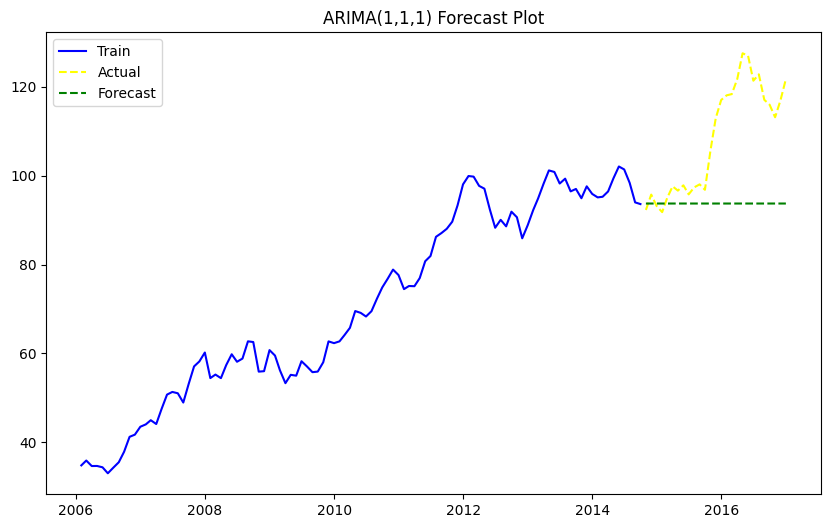

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(train, color='blue', label='Train')
plt.plot(test, color='yellow', label='Actual', linestyle='--')
plt.plot(forecast_vals, color='green', label='Forecast', linestyle='--')
plt.title("ARIMA(1,1,1) Forecast Plot")
plt.legend()
plt.show()

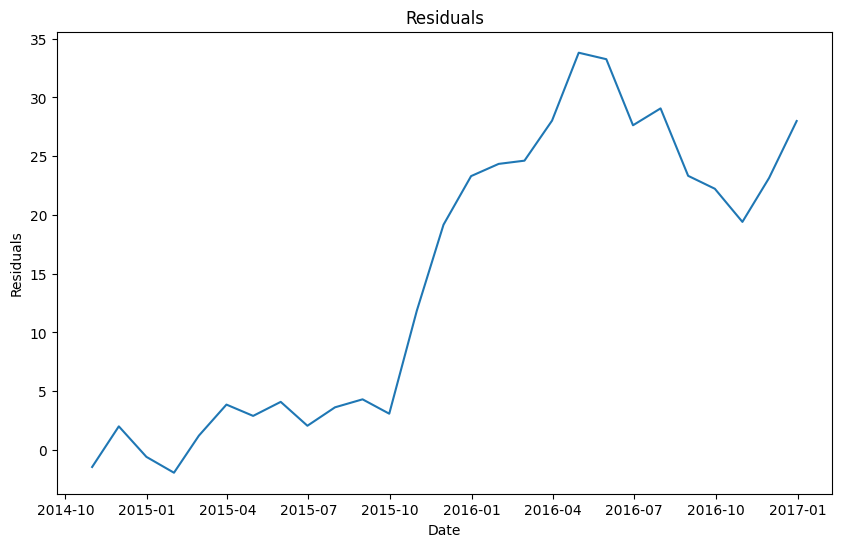

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.title("Residuals")
plt.show()